## Import Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Data Cleaning/ Prep

In [4]:
plays = pd.read_csv('plays.csv')
players = pd.read_csv('players.csv')
player_play = pd.read_csv('player_play.csv')
games = pd.read_csv('games.csv')


In [ ]:
# Load the pre-saved CSV file
combined_df_kc_tracking = pd.read_csv("combined_tracking_kc.csv")

In [ ]:
#you dont need to run the chunk below

In [6]:
# combining the tracking data and using only KC

# File path pattern for all weekly files
file_pattern = "tracking_week_*.csv"
# List to store each filtered DataFrame
filtered_dataframes = []
# Loop through each file that matches the pattern
for file in glob.glob(file_pattern):
    # Read the CSV file
    df = pd.read_csv(file)
    # Filter the DataFrame to only include rows where club is 'KC'
    df_kc_tracking = df[df['club'] == 'KC']
    # Append the filtered data to the list
    filtered_dataframes.append(df_kc_tracking)
# Concatenate all filtered DataFrames into a single DataFrame
combined_df_kc_tracking = pd.concat(filtered_dataframes, ignore_index=True)
# Display or save the final DataFrame
print(combined_df_kc_tracking.head())
# Save the concatenated DataFrame to a CSV file
combined_df_kc_tracking.to_csv("combined_tracking_kc.csv", index=False)

       gameId  playId    nflId   displayName  frameId    frameType  \
0  2022091110      55  40011.0  Travis Kelce        1  BEFORE_SNAP   
1  2022091110      55  40011.0  Travis Kelce        2  BEFORE_SNAP   
2  2022091110      55  40011.0  Travis Kelce        3  BEFORE_SNAP   
3  2022091110      55  40011.0  Travis Kelce        4  BEFORE_SNAP   
4  2022091110      55  40011.0  Travis Kelce        5  BEFORE_SNAP   

                    time  jerseyNumber club playDirection      x      y     s  \
0  2022-09-11 20:26:54.4          87.0   KC          left  90.58  30.43  1.63   
1  2022-09-11 20:26:54.5          87.0   KC          left  90.52  30.58  1.68   
2  2022-09-11 20:26:54.6          87.0   KC          left  90.44  30.73  1.69   
3  2022-09-11 20:26:54.7          87.0   KC          left  90.38  30.88  1.66   
4  2022-09-11 20:26:54.8          87.0   KC          left  90.32  31.04  1.67   

      a   dis       o     dir                 event  
0  0.02  0.16  306.95  333.36  huddle_

In [55]:
# filter the other data for KC 

# Filter plays data for Kansas City Chiefs
kc_plays = plays[plays['possessionTeam'] == 'KC']
#kc_plays = plays

# Filter player_play data for Kansas City Chiefs
kc_player_play = player_play[player_play['teamAbbr'] == 'KC']

# Filter games data for Kansas City Chiefs
kc_games = games[(games['homeTeamAbbr'] == 'KC') | (games['visitorTeamAbbr'] == 'KC')]

# Use the combined tracking data already filtered for KC
kc_tracking = combined_df_kc_tracking


# EDA 

## Play Tendencies

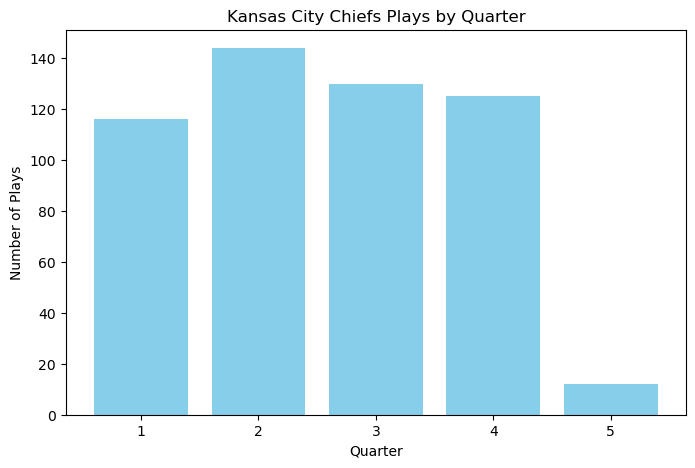

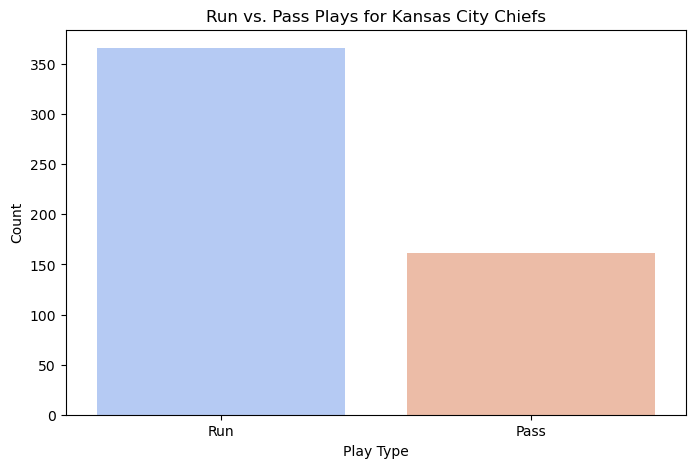

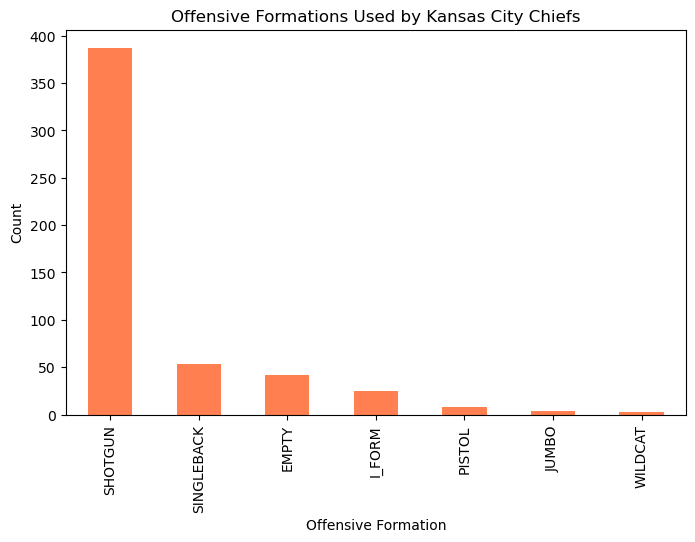

In [56]:
# play count by quarter 

# Count plays by quarter
plays_by_quarter = kc_plays['quarter'].value_counts().sort_index()

# Plot plays by quarter
plt.figure(figsize=(8, 5))
plt.bar(plays_by_quarter.index, plays_by_quarter.values, color='skyblue')
plt.xlabel('Quarter')
plt.ylabel('Number of Plays')
plt.title('Kansas City Chiefs Plays by Quarter')
plt.show()

# KC run or pass

# Count run vs. pass plays based on isDropback
run_vs_pass_counts = kc_plays['isDropback'].value_counts()

# Rename the index for clarity
run_vs_pass_counts.index = ['Run', 'Pass']

# Plot run vs. pass play counts 
plt.figure(figsize=(8, 5))
sns.barplot(x=run_vs_pass_counts.index, y=run_vs_pass_counts.values, hue=run_vs_pass_counts.index, dodge=False, palette='coolwarm', legend=False)
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.title('Run vs. Pass Plays for Kansas City Chiefs')
plt.legend([], [], frameon=False)  # Remove legend since we don't need it for single hues
plt.show()

# offensive formation usage 

# Count offensive formations
formation_counts = kc_plays['offenseFormation'].value_counts()

# Plot offensive formation usage
plt.figure(figsize=(8, 5))
formation_counts.plot(kind='bar', color='coral')
plt.xlabel('Offensive Formation')
plt.ylabel('Count')
plt.title('Offensive Formations Used by Kansas City Chiefs')
plt.show()

## Player level EDA

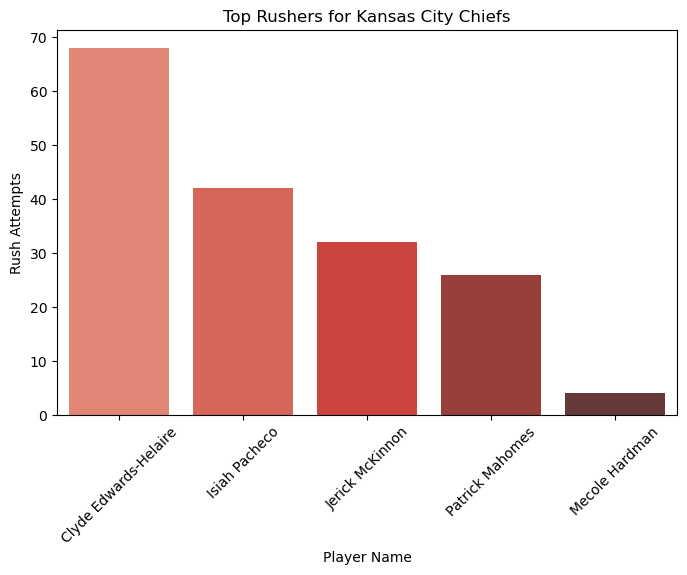

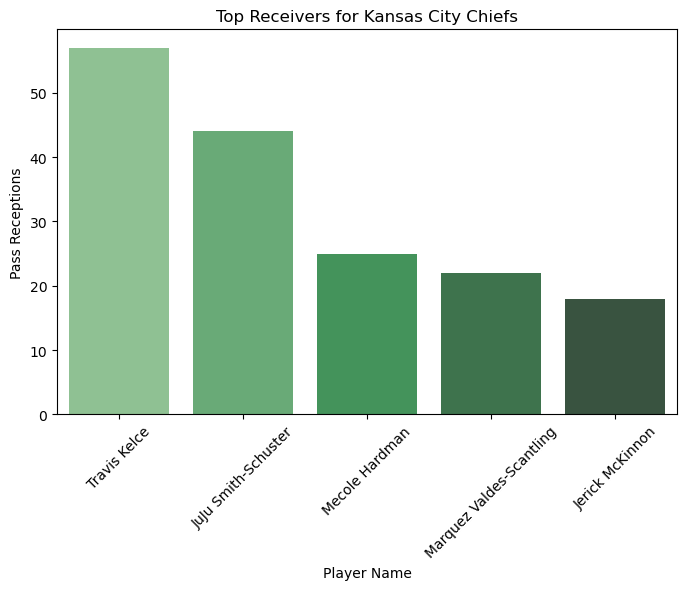

In [57]:
# Top players by rush attempts
top_rushers = kc_player_play[kc_player_play['hadRushAttempt'] == 1]['nflId'].value_counts().head(5)

# Convert the Series to a DataFrame and reset the index
top_rushers = top_rushers.reset_index()
top_rushers.columns = ['nflId', 'rushAttempts']  # Rename columns for clarity

# Merge with the players dataset to get player names
top_rushers = pd.merge(top_rushers, players, on='nflId', how='left')

# Plot top rushers 
plt.figure(figsize=(8, 5))
sns.barplot(x='displayName', y='rushAttempts', hue='displayName', dodge=False, data=top_rushers, palette='Reds_d', legend=False)
plt.xlabel('Player Name')
plt.ylabel('Rush Attempts')
plt.title('Top Rushers for Kansas City Chiefs')
plt.legend([], [], frameon=False)  # Remove legend
plt.xticks(rotation=45)
plt.show()

# Top players by pass receptions
top_receivers = kc_player_play[kc_player_play['hadPassReception'] == 1]['nflId'].value_counts().head(5)

# Convert the Series to a DataFrame and reset the index
top_receivers = top_receivers.reset_index()
top_receivers.columns = ['nflId', 'passReceptions']  # Rename columns for clarity

# Merge with the players dataset to get player names
top_receivers = pd.merge(top_receivers, players, on='nflId', how='left')

# Plot top receivers 
plt.figure(figsize=(8, 5))
sns.barplot(x='displayName', y='passReceptions', hue='displayName', dodge=False, data=top_receivers, palette='Greens_d', legend=False)
plt.xlabel('Player Name')
plt.ylabel('Pass Receptions')
plt.title('Top Receivers for Kansas City Chiefs')
plt.legend([], [], frameon=False)  # Remove legend
plt.xticks(rotation=45)
plt.show()

## Game-Level EDA

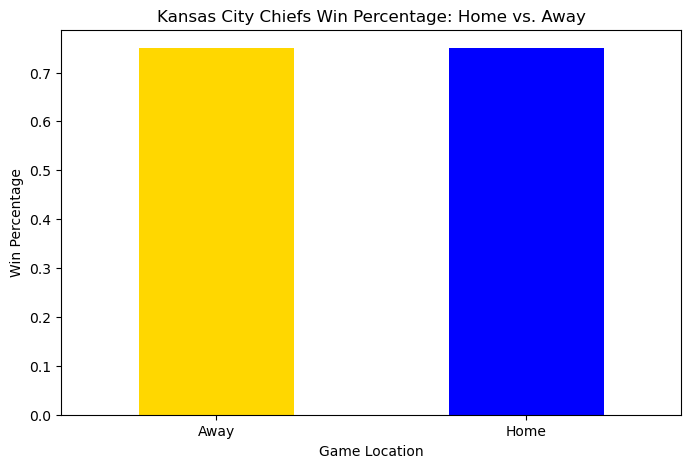

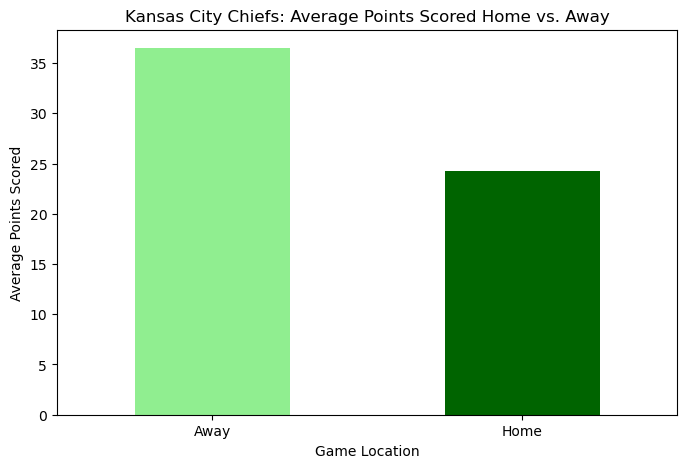

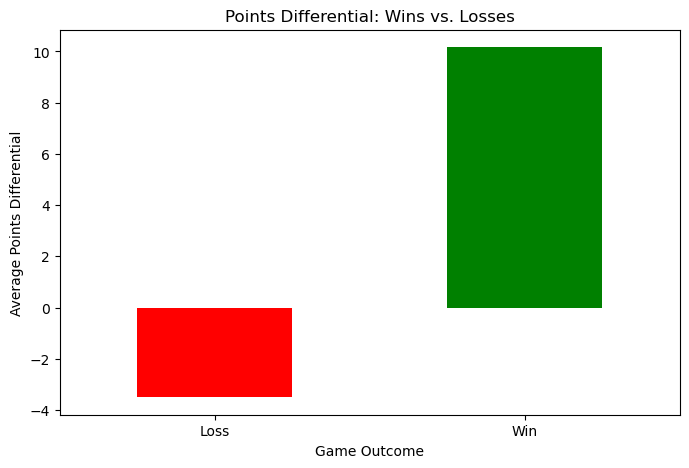

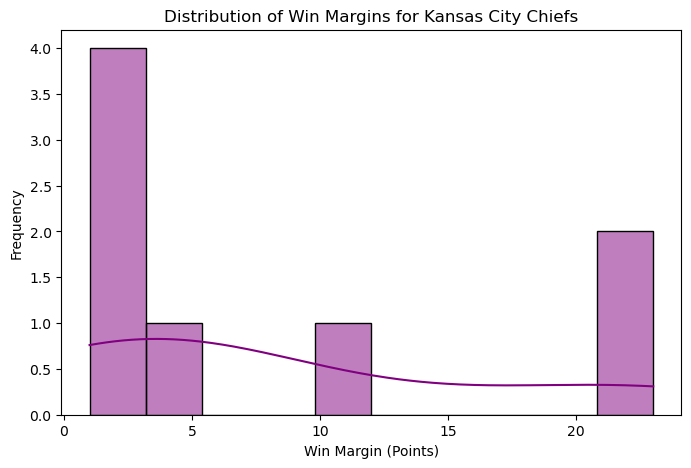

In [58]:
# Create a copy of the filtered DataFrame 
kc_games = kc_games.copy()

# Calculate whether KC is the home team
kc_games.loc[:, 'isHome'] = kc_games['homeTeamAbbr'] == 'KC'

# Calculate whether KC won the game
kc_games.loc[:, 'kcWin'] = ((kc_games['homeTeamAbbr'] == 'KC') & (kc_games['homeFinalScore'] > kc_games['visitorFinalScore'])) | \
                           ((kc_games['visitorTeamAbbr'] == 'KC') & (kc_games['visitorFinalScore'] > kc_games['homeFinalScore']))

# Calculate win percentage in home vs. away games
win_percentages = kc_games.groupby('isHome')['kcWin'].mean()

# Plot win percentages
plt.figure(figsize=(8, 5))
win_percentages.plot(kind='bar', color=['gold', 'blue'])
plt.xlabel('Game Location')
plt.ylabel('Win Percentage')
plt.title('Kansas City Chiefs Win Percentage: Home vs. Away')
plt.xticks([0, 1], ['Away', 'Home'], rotation=0)
plt.show()

# Calculate average points scored by KC in home vs. away games
kc_games['kcPoints'] = kc_games.apply(
    lambda row: row['homeFinalScore'] if row['homeTeamAbbr'] == 'KC' else row['visitorFinalScore'], axis=1
)
avg_points = kc_games.groupby('isHome')['kcPoints'].mean()

# Plot average points scored
plt.figure(figsize=(8, 5))
avg_points.plot(kind='bar', color=['lightgreen', 'darkgreen'])
plt.xlabel('Game Location')
plt.ylabel('Average Points Scored')
plt.title('Kansas City Chiefs: Average Points Scored Home vs. Away')
plt.xticks([0, 1], ['Away', 'Home'], rotation=0)
plt.show()

# Calculate points differential
kc_games['pointsDifferential'] = kc_games.apply(
    lambda row: (row['homeFinalScore'] - row['visitorFinalScore']) if row['homeTeamAbbr'] == 'KC' else
                (row['visitorFinalScore'] - row['homeFinalScore']), axis=1
)

# Separate games by win/loss
win_loss_diff = kc_games.groupby('kcWin')['pointsDifferential'].mean()

# Plot points differential
plt.figure(figsize=(8, 5))
win_loss_diff.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Game Outcome')
plt.ylabel('Average Points Differential')
plt.title('Points Differential: Wins vs. Losses')
plt.xticks([0, 1], ['Loss', 'Win'], rotation=0)
plt.show()


# Calculate win margin for KC games
kc_games['winMargin'] = kc_games.apply(
    lambda row: abs(row['homeFinalScore'] - row['visitorFinalScore']), axis=1
)

# Plot the distribution of win margins
plt.figure(figsize=(8, 5))
sns.histplot(kc_games['winMargin'], bins=10, kde=True, color='purple')
plt.xlabel('Win Margin (Points)')
plt.ylabel('Frequency')
plt.title('Distribution of Win Margins for Kansas City Chiefs')
plt.show()


The spread of this distribution indicates that they occasionally blowout teams (i.e. have big winning margins)

## Tracking Data EDA

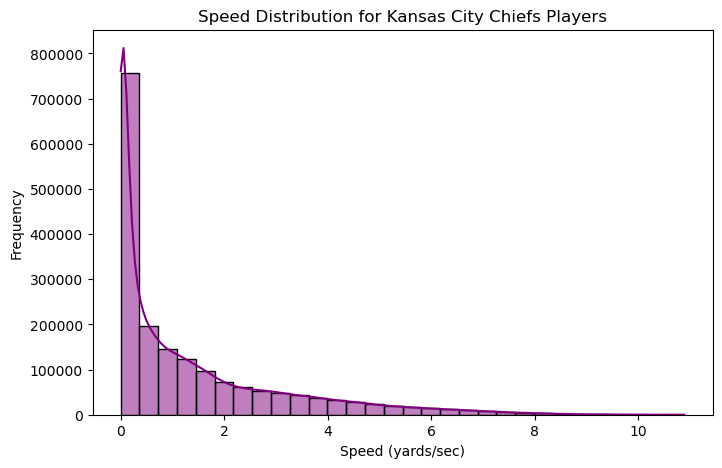

In [59]:
# Plot speed distribution for KC players
plt.figure(figsize=(8, 5))
sns.histplot(kc_tracking['s'], kde=True, bins=30, color='purple')
plt.xlabel('Speed (yards/sec)')
plt.ylabel('Frequency')
plt.title('Speed Distribution for Kansas City Chiefs Players')
plt.show()

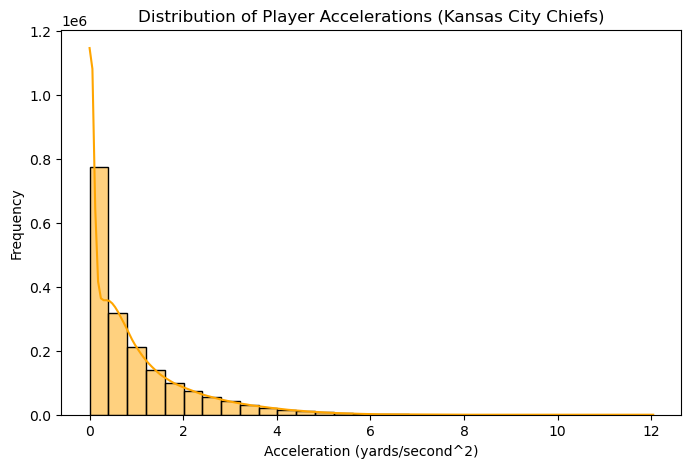

In [60]:
# how fast are players accelerating
# Plot distribution of acceleration
plt.figure(figsize=(8, 5))
sns.histplot(kc_tracking['a'], bins=30, kde=True, color='orange')
plt.xlabel('Acceleration (yards/second^2)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Accelerations (Kansas City Chiefs)')
plt.show()

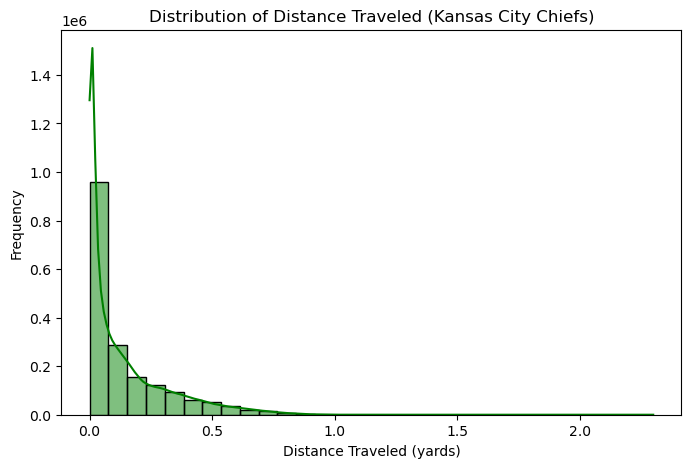

In [61]:
# Plot distribution of distance traveled
plt.figure(figsize=(8, 5))
sns.histplot(kc_tracking['dis'], bins=30, kde=True, color='green')
plt.xlabel('Distance Traveled (yards)')
plt.ylabel('Frequency')
plt.title('Distribution of Distance Traveled (Kansas City Chiefs)')
plt.show()

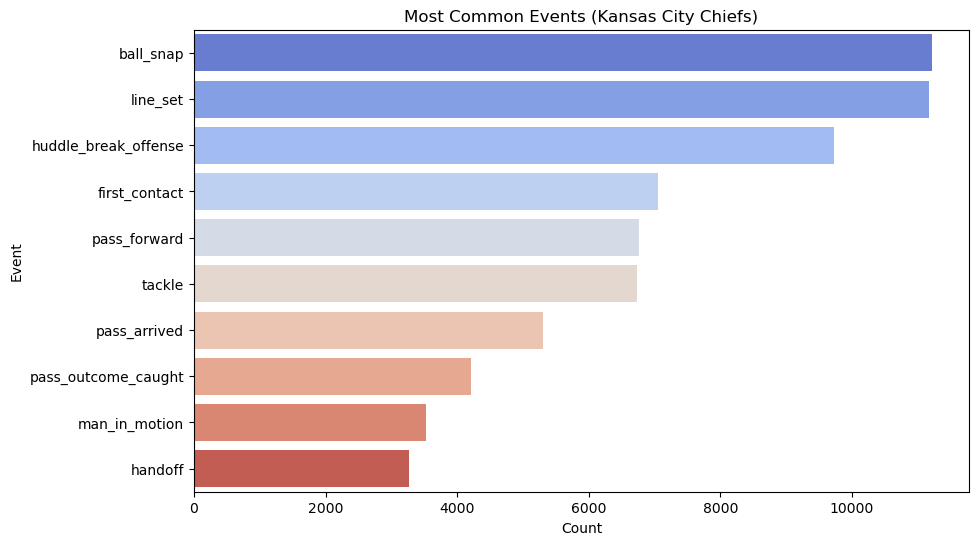

In [62]:
# Count most common events
event_counts = kc_tracking['event'].value_counts().head(10)

# Plot event counts
plt.figure(figsize=(10, 6))
sns.barplot(x=event_counts.values, y=event_counts.index, hue=event_counts.index, dodge=False, palette='coolwarm', legend=False)
plt.xlabel('Count')
plt.ylabel('Event')
plt.title('Most Common Events (Kansas City Chiefs)')
plt.show()

In [63]:
## Feature Engineering 

In [64]:
# Create a copy of kc_plays to avoid SettingWithCopyWarning
kc_plays = kc_plays.copy()

# Step 1: Score Differential
kc_plays['scoreDifferential'] = kc_plays['preSnapHomeScore'] - kc_plays['preSnapVisitorScore']
kc_plays['isLeading'] = (kc_plays['scoreDifferential'] > 0).astype(int)

# Step 2: Field Position
kc_plays['isRedZone'] = (kc_plays['absoluteYardlineNumber'] <= 20).astype(int)

# Step 3: Down and Distance
kc_plays['shortYardage'] = (kc_plays['yardsToGo'] <= 2).astype(int)
kc_plays['thirdAndLong'] = ((kc_plays['down'] == 3) & (kc_plays['yardsToGo'] > 7)).astype(int)

# Step 4: Game Context
kc_plays['fourthQuarter'] = (kc_plays['quarter'] == 4).astype(int)
kc_plays['twoMinuteDrill'] = (kc_plays['quarter'] >= 2) & (kc_plays['gameClock'].str.split(':').str[0].astype(int) <= 2)


In [65]:
## running predictive model ( gradient boosting ) 

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare Data
# Include newly engineered features
features = ['yardsToGo', 'quarter', 'down', 'expectedPoints', 'scoreDifferential', 'isLeading', 
            'isRedZone', 'shortYardage', 'thirdAndLong', 'fourthQuarter', 'twoMinuteDrill', 
            'preSnapHomeScore', 'preSnapVisitorScore', 'offenseFormation']

# Extract relevant columns
data = kc_plays[features + ['isDropback']].dropna()

# One-hot encode offensive formations
encoder = OneHotEncoder(sparse_output=False)
encoded_formations = encoder.fit_transform(data[['offenseFormation']])
formation_columns = [f'formation_{cat}' for cat in encoder.categories_[0]]
encoded_df = pd.DataFrame(encoded_formations, columns=formation_columns)

# Merge encoded features back into the dataset
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1).drop(columns=['offenseFormation'])

# Step 2: Define Features and Target
X = data.drop(columns=['isDropback'])
y = data['isDropback']

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.42      0.52        31
        True       0.79      0.92      0.85        74

    accuracy                           0.77       105
   macro avg       0.74      0.67      0.69       105
weighted avg       0.76      0.77      0.75       105

Accuracy Score:
0.7714285714285715


# XGBOOST

1. Accuracy
What it means: Accuracy is the percentage of plays the model predicts correctly, whether they are a pass or a run.
Example: If there are 100 plays and the model correctly predicts 85 of them, the accuracy is 85%.
Strength: It gives a simple overview of how often the model is right.
Weakness: If the dataset has more passes than runs, the model might predict "pass" most of the time and still have high accuracy, even if it rarely predicts "run" correctly.
2. Precision
What it means: Precision focuses on how often the model is correct when it predicts a pass (or you can calculate it for runs too). It tells us how many of the predicted passes were actually passes.
Formula: Precision = (Correct Pass Predictions) / (Total Pass Predictions)
Example: If the model predicts 50 plays as passes and 40 of those are actually passes, precision is 40/50 = 80%.
Use Case: Precision is important when you want to minimize false alarms. For example, you want to avoid predicting "pass" if it’s actually a "run."
3. Recall
What it means: Recall tells us how well the model identifies all the actual passes. It measures how many of the true passes the model successfully predicted.
Formula: Recall = (Correct Pass Predictions) / (Total Actual Passes)
Example: If there are 60 actual passes and the model correctly predicts 40 of them, recall is 40/60 = 66.7%.
Use Case: Recall is crucial when you don’t want to miss predicting any passes. For example, if missing a "pass" prediction is costly, you’ll prioritize recall.
4. PRAUC (Precision-Recall Area Under Curve)
What it means: PRAUC is a summary of how the model performs across different thresholds for predicting "pass" or "run." It combines precision and recall into a single score.
Why it’s useful: It helps when the dataset is imbalanced (e.g., way more passes than runs) because it focuses on how well the model performs on the minority class (e.g., runs).
Better PRAUC: A higher PRAUC means the model balances precision and recall well across all thresholds.
5. ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve)
What it means: The ROC curve shows how well the model distinguishes between passes and runs by plotting the trade-off between:
True Positive Rate (Recall): How many actual passes are predicted correctly.
False Positive Rate: How often the model wrongly predicts "pass" when it’s actually "run."
AUC (Area Under Curve): A single score summarizing the ROC curve. A perfect model has an AUC of 1.0, while a random guess has an AUC of 0.5.
Why it’s useful: It shows how well the model distinguishes between passes and runs overall, regardless of the prediction threshold.
How They Work Together:
Accuracy: General correctness of predictions.
Precision: Focuses on how clean the predictions are (minimizing false positives).
Recall: Focuses on capturing all true instances (minimizing false negatives).
PRAUC: Evaluates how well the model balances precision and recall for a class, especially useful in imbalanced datasets.
ROC AUC: Measures the overall ability of the model to distinguish between pass and run plays.
By considering these metrics, you can choose the right balance for your model depending on whether missing predictions or being overly cautious is more important.

In [51]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, 
    average_precision_score, classification_report
)
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

# Step 1: Prepare Data
# Assume `kc_plays` is a pre-loaded DataFrame.
features = ['yardsToGo', 'quarter', 'down', 'expectedPoints', 'scoreDifferential', 'isLeading', 
            'isRedZone', 'shortYardage', 'thirdAndLong', 'fourthQuarter', 'twoMinuteDrill', 
            'preSnapHomeScore', 'preSnapVisitorScore', 'offenseFormation']

data = kc_plays[features + ['isDropback']].dropna()

# One-hot encode offensive formations
encoder = OneHotEncoder(sparse_output=False)
encoded_formations = encoder.fit_transform(data[['offenseFormation']])
formation_columns = [f'formation_{cat}' for cat in encoder.categories_[0]]
encoded_df = pd.DataFrame(encoded_formations, columns=formation_columns)

# Merge encoded features back into the dataset
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1).drop(columns=['offenseFormation'])

X = data.drop(columns=['isDropback'])
y = data['isDropback']

# Split the data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=28, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=28, stratify=y_train_full)

# Define the Optuna objective function
def objective(trial):
    # Adjusted parameter ranges based on the best trial
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth': trial.suggest_int('max_depth', 2, 7),  # Around 3
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),  # Around 0.073
        'subsample': trial.suggest_float('subsample', 0.5, 0.8),  # Around 0.613
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.8),  # Around 0.852
        'n_estimators': trial.suggest_int('n_estimators', 300, 500),  # Around 727
        'reg_alpha': trial.suggest_float('reg_alpha', 3.5, 5.5),  # Around 4.999
        'reg_lambda': trial.suggest_float('reg_lambda', 3.5, 5),  # Around 4.615
    }
    
    # XGBoost model with Stratified K-Fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model = xgb.XGBClassifier(**params)
        model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
        
        y_pred = model.predict_proba(X_val_fold)[:, 1]
        auc_scores.append(roc_auc_score(y_val_fold, y_pred))
    
    return np.mean(auc_scores)

# Run Optuna optimization with adjusted ranges
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

# Best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train final model with best hyperparameters on the entire training set
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train_full, y_train_full)

# Cross-validation metrics for the best model
cv_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in skf.split(X_train_full, y_train_full):
    X_train_fold, X_val_fold = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]
    
    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
    
    y_pred = model.predict(X_val_fold)
    y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
    
    metrics = {
        'accuracy': accuracy_score(y_val_fold, y_pred),
        'precision': precision_score(y_val_fold, y_pred),
        'recall': recall_score(y_val_fold, y_pred),
        'roc_auc': roc_auc_score(y_val_fold, y_pred_proba),
        'pr_auc': average_precision_score(y_val_fold, y_pred_proba)
    }
    cv_results.append(metrics)

# Print cross-validation results
cv_df = pd.DataFrame(cv_results)
print("Cross-Validation Results:")
print(cv_df)

# Evaluate on the test set
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]

test_metrics = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred),
    'roc_auc': roc_auc_score(y_test, y_test_pred_proba),
    'pr_auc': average_precision_score(y_test, y_test_pred_proba)
}

print("Test Set Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")


[I 2024-11-25 23:08:09,445] A new study created in memory with name: no-name-0d30e787-5af5-4419-abad-99c57ee04c95
[I 2024-11-25 23:08:13,418] Trial 0 finished with value: 0.7860006273888012 and parameters: {'max_depth': 7, 'learning_rate': 0.15417281599477328, 'subsample': 0.6690322515116343, 'colsample_bytree': 0.6330844054743027, 'n_estimators': 383, 'reg_alpha': 4.8754621283998025, 'reg_lambda': 3.6994391766528496}. Best is trial 0 with value: 0.7860006273888012.
[I 2024-11-25 23:08:17,071] Trial 1 finished with value: 0.7835808855548543 and parameters: {'max_depth': 7, 'learning_rate': 0.15692814478442135, 'subsample': 0.625959142969496, 'colsample_bytree': 0.679868202069582, 'n_estimators': 378, 'reg_alpha': 3.9163297023966575, 'reg_lambda': 4.9291014942244935}. Best is trial 0 with value: 0.7860006273888012.
[I 2024-11-25 23:08:19,490] Trial 2 finished with value: 0.8023349597732263 and parameters: {'max_depth': 3, 'learning_rate': 0.07660833398474136, 'subsample': 0.754332054608

Best Hyperparameters: {'max_depth': 4, 'learning_rate': 0.054238433629758984, 'subsample': 0.7443763196948939, 'colsample_bytree': 0.7783798981988443, 'n_estimators': 314, 'reg_alpha': 3.6778408489507983, 'reg_lambda': 4.200707950923127}
Cross-Validation Results:
   accuracy  precision    recall   roc_auc    pr_auc
0  0.749804   0.793967  0.796010  0.810695  0.875062
1  0.736078   0.779328  0.790862  0.806612  0.871410
2  0.747451   0.782258  0.811454  0.808091  0.869394
3  0.732444   0.774905  0.790862  0.793309  0.857332
4  0.741467   0.787043  0.789575  0.802835  0.872385
Test Set Metrics:
accuracy: 0.7503
precision: 0.7937
recall: 0.7977
roc_auc: 0.8198
pr_auc: 0.8813


Best Hyperparameters: {'max_depth': 3, 'learning_rate': 0.09490877454330676, 'subsample': 0.655257120647245, 'colsample_bytree': 0.8084464724153039, 'n_estimators': 727, 'reg_alpha': 4.936146133115545, 'reg_lambda': 4.851170296370427}
Cross-Validation Results:
   accuracy  precision    recall   roc_auc    pr_auc
0  0.785714   0.805970  0.915254  0.856949  0.940232
1  0.714286   0.733333  0.932203  0.768814  0.884050
2  0.734940   0.772727  0.879310  0.782414  0.874839
3  0.771084   0.800000  0.896552  0.795172  0.909296
4  0.722892   0.769231  0.862069  0.793793  0.894040
Test Set Metrics:
accuracy: 0.8190
precision: 0.8161
recall: 0.9595
roc_auc: 0.8522
pr_auc: 0.9329

Best Hyperparameters: {'max_depth': 3, 'learning_rate': 0.17433718856964608, 'subsample': 0.7956444023534465, 'colsample_bytree': 0.6093002867519856, 'n_estimators': 365, 'reg_alpha': 4.908074540767989, 'reg_lambda': 4.914187200807749}
Cross-Validation Results:
   accuracy  precision    recall   roc_auc    pr_auc
0  0.773810   0.785714  0.932203  0.843390  0.932008
1  0.690476   0.726027  0.898305  0.741695  0.868532
2  0.734940   0.772727  0.879310  0.798966  0.894650
3  0.771084   0.800000  0.896552  0.797931  0.910927
4  0.722892   0.761194  0.879310  0.791724  0.890940
Test Set Metrics:
accuracy: 0.8000
precision: 0.7978
recall: 0.9595
roc_auc: 0.8418
pr_auc: 0.9239

### Tuning Threshold

In [32]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, 
    average_precision_score, classification_report
)
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

# Step 1: Prepare Data
# Assume `kc_plays` is a pre-loaded DataFrame.
features = ['yardsToGo', 'quarter', 'down', 'expectedPoints', 'scoreDifferential', 'isLeading', 
            'isRedZone', 'shortYardage', 'thirdAndLong', 'fourthQuarter', 'twoMinuteDrill', 
            'preSnapHomeScore', 'preSnapVisitorScore', 'offenseFormation']

data = kc_plays[features + ['isDropback']].dropna()

# One-hot encode offensive formations
encoder = OneHotEncoder(sparse_output=False)
encoded_formations = encoder.fit_transform(data[['offenseFormation']])
formation_columns = [f'formation_{cat}' for cat in encoder.categories_[0]]
encoded_df = pd.DataFrame(encoded_formations, columns=formation_columns)

# Merge encoded features back into the dataset
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1).drop(columns=['offenseFormation'])

X = data.drop(columns=['isDropback'])
y = data['isDropback']

# Split the data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=28, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=28, stratify=y_train_full)

# Define the Optuna objective function
def objective(trial):
    # Adjusted parameter ranges based on the best trial
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth': trial.suggest_int('max_depth',2,4),  # Around 3
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.4),  # Around 0.073
        'subsample': trial.suggest_float('subsample', 0.5, 0.8),  # Around 0.613
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1),  # Around 0.852
        'n_estimators': trial.suggest_int('n_estimators', 300, 500),  # Around 727
        'reg_alpha': trial.suggest_float('reg_alpha', 3.5, 5.5),  # Around 4.999
        'reg_lambda': trial.suggest_float('reg_lambda', 3.5, 5),  # Around 4.615
    }
    
    # XGBoost model with Stratified K-Fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model = xgb.XGBClassifier(**params)
        model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
        
        y_pred = model.predict_proba(X_val_fold)[:, 1]
        # Adjust the threshold
        # Adjust the threshold
        # Adjust the threshold
        # Adjust the threshold
        threshold = 0.6  # Example: Increase to improve precision
        y_pred = (y_pred > threshold).astype(int)
        auc_scores.append(roc_auc_score(y_val_fold, y_pred))
    
    return np.mean(auc_scores)

# Run Optuna optimization with adjusted ranges
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

# Best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train final model with best hyperparameters on the entire training set
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train_full, y_train_full)

# Cross-validation metrics for the best model
cv_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in skf.split(X_train_full, y_train_full):
    X_train_fold, X_val_fold = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]
    
    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
    
    y_pred = model.predict(X_val_fold)
    y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
    # Adjust the threshold
    # Adjust the threshold
    # Adjust the threshold
    # Adjust the threshold
    threshold = 0.6  # Example: Increase to improve precision
    y_pred_proba = (y_pred_proba > threshold).astype(int)
    
    metrics = {
        'accuracy': accuracy_score(y_val_fold, y_pred),
        'precision': precision_score(y_val_fold, y_pred),
        'recall': recall_score(y_val_fold, y_pred),
        'roc_auc': roc_auc_score(y_val_fold, y_pred_proba),
        'pr_auc': average_precision_score(y_val_fold, y_pred_proba)
    }
    cv_results.append(metrics)

# Print cross-validation results
cv_df = pd.DataFrame(cv_results)
print("Cross-Validation Results:")
print(cv_df)

# Evaluate on the test set
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]
threshold = 0.6  # Example: Increase to improve precision
y_test_pred_proba = (y_test_pred_proba > threshold).astype(int)

test_metrics = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred),
    'roc_auc': roc_auc_score(y_test, y_test_pred_proba),
    'pr_auc': average_precision_score(y_test, y_test_pred_proba)
}

print("Test Set Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")


[I 2024-11-25 18:10:54,458] A new study created in memory with name: no-name-ac52f790-b45f-461d-96f0-713b46e96d4c
[I 2024-11-25 18:10:55,394] Trial 0 finished with value: 0.652058279370953 and parameters: {'max_depth': 3, 'learning_rate': 0.08987086442488806, 'subsample': 0.634156315341234, 'colsample_bytree': 0.600514912897813, 'n_estimators': 423, 'reg_alpha': 5.394754408804621, 'reg_lambda': 4.449304468273167}. Best is trial 0 with value: 0.652058279370953.
[I 2024-11-25 18:10:56,281] Trial 1 finished with value: 0.6591396854764108 and parameters: {'max_depth': 2, 'learning_rate': 0.20046163824131352, 'subsample': 0.5489167259951194, 'colsample_bytree': 0.923798739018227, 'n_estimators': 379, 'reg_alpha': 5.498684321485218, 'reg_lambda': 3.6728749912957754}. Best is trial 1 with value: 0.6591396854764108.
[I 2024-11-25 18:10:57,288] Trial 2 finished with value: 0.6834551341350601 and parameters: {'max_depth': 4, 'learning_rate': 0.18632667972987754, 'subsample': 0.5179554651660936, 

Best Hyperparameters: {'max_depth': 2, 'learning_rate': 0.39980651905987175, 'subsample': 0.7804374720645318, 'colsample_bytree': 0.6775538663179027, 'n_estimators': 485, 'reg_alpha': 3.6394181581362934, 'reg_lambda': 4.8962914477306425}
Cross-Validation Results:
   accuracy  precision    recall   roc_auc    pr_auc
0  0.809524   0.841270  0.898305  0.775254  0.845743
1  0.666667   0.724638  0.847458  0.649831  0.773114
2  0.698795   0.753846  0.844828  0.679310  0.786810
3  0.746988   0.784615  0.879310  0.687931  0.791423
4  0.710843   0.757576  0.862069  0.685172  0.789189
Test Set Metrics:
accuracy: 0.7810
precision: 0.7865
recall: 0.9459
roc_auc: 0.7618
pr_auc: 0.8370


Best Hyperparameters: {'max_depth': 2, 'learning_rate': 0.39980651905987175, 'subsample': 0.7804374720645318, 'colsample_bytree': 0.6775538663179027, 'n_estimators': 485, 'reg_alpha': 3.6394181581362934, 'reg_lambda': 4.8962914477306425}
Cross-Validation Results:
   accuracy  precision    recall   roc_auc    pr_auc
0  0.809524   0.841270  0.898305  0.775254  0.845743
1  0.666667   0.724638  0.847458  0.649831  0.773114
2  0.698795   0.753846  0.844828  0.679310  0.786810
3  0.746988   0.784615  0.879310  0.687931  0.791423
4  0.710843   0.757576  0.862069  0.685172  0.789189
Test Set Metrics:
accuracy: 0.7810
precision: 0.7865
recall: 0.9459
roc_auc: 0.7618
pr_auc: 0.8370

### Using f1 score as defined metric in XGBOOST

Why? Use a custom metric in eval_metric during training: Combine precision and recall into a single score like F1 for optimization. Key Updates
F1 Score Optimization:

The custom_objective function now optimizes the mean F1 score across cross-validation folds.
f1_score is calculated using predictions from the validation fold.
Final Model Evaluation:

F1 score is included in the evaluation of the test set metrics and cross-validation results.
Benefits of F1 Optimization
F1 score balances precision and recall, making it ideal for cases where both false positives and false negatives are critical.
By optimizing this metric, the model performs well for both precision and recall, making it robust for imbalanced datasets.

In [52]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, 
    average_precision_score, f1_score, classification_report
)
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

# Step 1: Prepare Data
# Assume `kc_plays` is a pre-loaded DataFrame.
features = ['yardsToGo', 'quarter', 'down', 'expectedPoints', 'scoreDifferential', 'isLeading', 
            'isRedZone', 'shortYardage', 'thirdAndLong', 'fourthQuarter', 'twoMinuteDrill', 
            'preSnapHomeScore', 'preSnapVisitorScore', 'offenseFormation']

data = kc_plays[features + ['isDropback']].dropna()

# One-hot encode offensive formations
encoder = OneHotEncoder(sparse_output=False)
encoded_formations = encoder.fit_transform(data[['offenseFormation']])
formation_columns = [f'formation_{cat}' for cat in encoder.categories_[0]]
encoded_df = pd.DataFrame(encoded_formations, columns=formation_columns)

# Merge encoded features back into the dataset
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1).drop(columns=['offenseFormation'])

X = data.drop(columns=['isDropback'])
y = data['isDropback']

# Split the data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=28, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=28, stratify=y_train_full)

# Define the Optuna objective function
def custom_objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',  # Default evaluation metric
        'max_depth': trial.suggest_int('max_depth', 2, 5),  # Around 3
        'learning_rate': trial.suggest_float('learning_rate', 0.07, 0.12),  # Around 0.094
        'subsample': trial.suggest_float('subsample', 0.6, 0.7),  # Around 0.655
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 0.85),  # Around 0.808
        'n_estimators': trial.suggest_int('n_estimators', 700, 750),  # Around 727
        'reg_alpha': trial.suggest_float('reg_alpha', 4.5, 5.5),  # Around 4.936
        'reg_lambda': trial.suggest_float('reg_lambda', 4.5, 5),  # Around 4.851
    }
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model = xgb.XGBClassifier(**params)
        model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
        
        y_pred = model.predict(X_val_fold)
        f1_scores.append(f1_score(y_val_fold, y_pred))
    
    return np.mean(f1_scores)

# Run Optuna optimization with F1 score as the primary metric
study = optuna.create_study(direction='maximize')
study.optimize(custom_objective, n_trials=200)

# Best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train final model with best hyperparameters on the entire training set
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train_full, y_train_full)

# Cross-validation metrics for the best model
cv_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in skf.split(X_train_full, y_train_full):
    X_train_fold, X_val_fold = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]
    
    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
    
    y_pred = model.predict(X_val_fold)
    y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
    
    metrics = {
        'accuracy': accuracy_score(y_val_fold, y_pred),
        'precision': precision_score(y_val_fold, y_pred),
        'recall': recall_score(y_val_fold, y_pred),
        'f1_score': f1_score(y_val_fold, y_pred),  # Include F1 score in evaluation
        'roc_auc': roc_auc_score(y_val_fold, y_pred_proba),
        'pr_auc': average_precision_score(y_val_fold, y_pred_proba)
    }
    print(f"Fold Classification Report:\n{classification_report(y_val_fold, y_pred)}")
    cv_results.append(metrics)

# Print cross-validation results
cv_df = pd.DataFrame(cv_results)
print("Cross-Validation Results:")
print(cv_df)

# Evaluate on the test set
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]

test_metrics = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred),
    'f1_score': f1_score(y_test, y_test_pred),  # F1 score for the test set
    'roc_auc': roc_auc_score(y_test, y_test_pred_proba),
    'pr_auc': average_precision_score(y_test, y_test_pred_proba)
}

print("Test Set Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Print classification report for the test set
print(f"Test Set Classification Report:\n{classification_report(y_test, y_test_pred)}")


[I 2024-11-25 23:43:36,152] A new study created in memory with name: no-name-b1f49e3c-c97c-4b84-87e4-dc1c7286a56c
[I 2024-11-25 23:43:38,768] Trial 0 finished with value: 0.7864361223899768 and parameters: {'max_depth': 2, 'learning_rate': 0.09474911091517721, 'subsample': 0.6209526534273875, 'colsample_bytree': 0.8277116445475066, 'n_estimators': 708, 'reg_alpha': 5.040277848623634, 'reg_lambda': 4.813901980618758}. Best is trial 0 with value: 0.7864361223899768.
[I 2024-11-25 23:43:41,227] Trial 1 finished with value: 0.7855950613886694 and parameters: {'max_depth': 2, 'learning_rate': 0.10062042658004537, 'subsample': 0.6325637666043601, 'colsample_bytree': 0.8021838377793209, 'n_estimators': 738, 'reg_alpha': 5.2758574461977075, 'reg_lambda': 4.6024668567075}. Best is trial 0 with value: 0.7864361223899768.
[I 2024-11-25 23:43:43,680] Trial 2 finished with value: 0.7869058490764159 and parameters: {'max_depth': 2, 'learning_rate': 0.09597650736345338, 'subsample': 0.623887703855912

Best Hyperparameters: {'max_depth': 2, 'learning_rate': 0.07138473370924164, 'subsample': 0.694665738737534, 'colsample_bytree': 0.8431678372952299, 'n_estimators': 747, 'reg_alpha': 4.674944059975907, 'reg_lambda': 4.985533246916715}
Fold Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.66      0.67       996
        True       0.79      0.81      0.80      1554

    accuracy                           0.75      2550
   macro avg       0.73      0.73      0.73      2550
weighted avg       0.75      0.75      0.75      2550

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.64      0.65       996
        True       0.77      0.80      0.79      1554

    accuracy                           0.73      2550
   macro avg       0.72      0.72      0.72      2550
weighted avg       0.73      0.73      0.73      2550

Fold Classification Report:
              precision    

Best Hyperparameters: {'max_depth': 2, 'learning_rate': 0.11240384461977183, 'subsample': 0.6547938958624616, 'colsample_bytree': 0.8400280226959342, 'n_estimators': 732, 'reg_alpha': 5.229841488871, 'reg_lambda': 4.698118229704699}
Fold Classification Report:
              precision    recall  f1-score   support

       False       0.62      0.40      0.49        25
        True       0.78      0.90      0.83        59

    accuracy                           0.75        84
   macro avg       0.70      0.65      0.66        84
weighted avg       0.73      0.75      0.73        84

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.20      0.29        25
        True       0.73      0.92      0.81        59

    accuracy                           0.70        84
   macro avg       0.61      0.56      0.55        84
weighted avg       0.66      0.70      0.66        84

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.36      0.46        25
        True       0.77      0.91      0.83        58

    accuracy                           0.75        83
   macro avg       0.71      0.64      0.65        83
weighted avg       0.73      0.75      0.72        83

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.62      0.40      0.49        25
        True       0.78      0.90      0.83        58

    accuracy                           0.75        83
   macro avg       0.70      0.65      0.66        83
weighted avg       0.73      0.75      0.73        83

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.53      0.36      0.43        25
        True       0.76      0.86      0.81        58

    accuracy                           0.71        83
   macro avg       0.64      0.61      0.62        83
weighted avg       0.69      0.71      0.69        83

Cross-Validation Results:
   accuracy  precision    recall  f1_score   roc_auc    pr_auc
0  0.750000   0.779412  0.898305  0.834646  0.843729  0.932153
1  0.702381   0.729730  0.915254  0.812030  0.760000  0.893841
2  0.746988   0.768116  0.913793  0.834646  0.803103  0.884685
3  0.746988   0.776119  0.896552  0.832000  0.805517  0.919176
4  0.710843   0.757576  0.862069  0.806452  0.790345  0.896511
Test Set Metrics:
accuracy: 0.7905
precision: 0.7889
recall: 0.9595
f1_score: 0.8659
roc_auc: 0.8522
pr_auc: 0.9296
Test Set Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.39      0.52        31
        True       0.79      0.96      0.87        74

    accuracy                           0.79       105
   macro avg       0.79      0.67      0.69       105
weighted avg       0.79      0.79      0.76       105

# RANDOM FOREST

In [68]:
import pandas as pd
import numpy as np
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, 
    average_precision_score, f1_score, classification_report
)
from sklearn.preprocessing import OneHotEncoder

# Step 1: Prepare Data
# Assume `kc_plays` is a pre-loaded DataFrame.
features = ['yardsToGo', 'quarter', 'down', 'expectedPoints', 'scoreDifferential', 'isLeading', 
            'isRedZone', 'shortYardage', 'thirdAndLong', 'fourthQuarter', 'twoMinuteDrill', 
            'preSnapHomeScore', 'preSnapVisitorScore', 'offenseFormation']

data = kc_plays[features + ['isDropback']].dropna()

# One-hot encode offensive formations
encoder = OneHotEncoder(sparse_output=False)
encoded_formations = encoder.fit_transform(data[['offenseFormation']])
formation_columns = [f'formation_{cat}' for cat in encoder.categories_[0]]
encoded_df = pd.DataFrame(encoded_formations, columns=formation_columns)

# Merge encoded features back into the dataset
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1).drop(columns=['offenseFormation'])

X = data.drop(columns=['isDropback'])
y = data['isDropback']

# Split the data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=28, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=28, stratify=y_train_full)

# Define the Optuna objective function
def custom_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 400),  # Number of trees
        'max_depth': trial.suggest_int('max_depth', 3, 5),  # Depth of each tree
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 6),  # Min samples to split a node
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 3),  # Min samples at leaf node
        'max_features': trial.suggest_float('max_features', 0.35, 0.55)  # Fraction of features for splits
    }
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=28)
    f1_scores = []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model = RandomForestClassifier(**params, random_state=28, n_jobs=-1,class_weight='balanced')
        model.fit(X_train_fold, y_train_fold)
        
        y_pred = model.predict(X_val_fold)
        f1_scores.append(f1_score(y_val_fold, y_pred))
    
    # Print current trial metrics
    #print(f"Trial {trial.number}: F1 Score = {np.mean(f1_scores):.4f}, Parameters = {params}")
    
    return np.mean(f1_scores)

# Run Optuna optimization with F1 score as the primary metric
study = optuna.create_study(direction='maximize')
study.optimize(custom_objective, n_trials=300)

# Print best trial results
print("\nBest Trial:")
print(f"  Trial Number: {study.best_trial.number}")
print(f"  Best F1 Score: {study.best_trial.value:.4f}")
print(f"  Best Parameters: {study.best_trial.params}")

# Train final model with best hyperparameters on the entire training set
best_params = study.best_params
final_model = RandomForestClassifier(**best_params, random_state=28, n_jobs=-1,class_weight='balanced')
final_model.fit(X_train_full, y_train_full)

# Cross-validation metrics for the best model
cv_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in skf.split(X_train_full, y_train_full):
    X_train_fold, X_val_fold = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]
    
    model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1,class_weight='balanced')
    model.fit(X_train_fold, y_train_fold)
    
    y_pred = model.predict(X_val_fold)
    y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
    
    metrics = {
        'accuracy': accuracy_score(y_val_fold, y_pred),
        'precision': precision_score(y_val_fold, y_pred),
        'recall': recall_score(y_val_fold, y_pred),
        'f1_score': f1_score(y_val_fold, y_pred),  # Include F1 score in evaluation
        'roc_auc': roc_auc_score(y_val_fold, y_pred_proba),
        'pr_auc': average_precision_score(y_val_fold, y_pred_proba)
    }
    print(f"Fold Classification Report:\n{classification_report(y_val_fold, y_pred)}")
    cv_results.append(metrics)

# Print cross-validation results
cv_df = pd.DataFrame(cv_results)
print("\nCross-Validation Results:")
print(cv_df)

# Evaluate on the test set
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]

test_metrics = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred),
    'f1_score': f1_score(y_test, y_test_pred),  # F1 score for the test set
    'roc_auc': roc_auc_score(y_test, y_test_pred_proba),
    'pr_auc': average_precision_score(y_test, y_test_pred_proba)
}

print("\nTest Set Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Print classification report for the test set
print(f"\nTest Set Classification Report:\n{classification_report(y_test, y_test_pred)}")


[I 2024-11-26 00:11:14,953] A new study created in memory with name: no-name-111d1e4a-888c-46c8-b229-8eb1df76c905
[I 2024-11-26 00:11:16,892] Trial 0 finished with value: 0.7933627137666937 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.37475264454911156}. Best is trial 0 with value: 0.7933627137666937.
[I 2024-11-26 00:11:18,699] Trial 1 finished with value: 0.790678955453149 and parameters: {'n_estimators': 287, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.419881790348535}. Best is trial 0 with value: 0.7933627137666937.
[I 2024-11-26 00:11:20,047] Trial 2 finished with value: 0.7791310114521325 and parameters: {'n_estimators': 204, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.4224728911774374}. Best is trial 0 with value: 0.7933627137666937.
[I 2024-11-26 00:11:22,663] Trial 3 finished with value: 0.8051342396282288 and parameters: {'n_estim


Best Trial:
  Trial Number: 28
  Best F1 Score: 0.8132
  Best Parameters: {'n_estimators': 309, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.3663565779347745}
Fold Classification Report:
              precision    recall  f1-score   support

       False       0.58      0.60      0.59        25
        True       0.83      0.81      0.82        59

    accuracy                           0.75        84
   macro avg       0.70      0.71      0.70        84
weighted avg       0.75      0.75      0.75        84

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.48      0.40      0.43        25
        True       0.76      0.81      0.79        59

    accuracy                           0.69        84
   macro avg       0.62      0.61      0.61        84
weighted avg       0.68      0.69      0.68        84

Fold Classification Report:
              precision    recall  f1-score   support

       Fals

Best Trial:
  Trial Number: 94
  Best F1 Score: 0.8404
  Best Parameters: {'n_estimators': 381, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 0.522749077760938}
Fold Classification Report:
              precision    recall  f1-score   support

       False       0.69      0.36      0.47        25
        True       0.77      0.93      0.85        59

    accuracy                           0.76        84
   macro avg       0.73      0.65      0.66        84
weighted avg       0.75      0.76      0.74        84

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.57      0.16      0.25        25
        True       0.73      0.95      0.82        59

    accuracy                           0.71        84
   macro avg       0.65      0.55      0.54        84
weighted avg       0.68      0.71      0.65        84

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.62      0.20      0.30        25
        True       0.73      0.95      0.83        58

    accuracy                           0.72        83
   macro avg       0.68      0.57      0.57        83
weighted avg       0.70      0.72      0.67        83

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.56      0.20      0.29        25
        True       0.73      0.93      0.82        58

    accuracy                           0.71        83
   macro avg       0.64      0.57      0.56        83
weighted avg       0.68      0.71      0.66        83

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.36      0.46        25
        True       0.77      0.91      0.83        58

    accuracy                           0.75        83
   macro avg       0.71      0.64      0.65        83
weighted avg       0.73      0.75      0.72        83


Cross-Validation Results:
   accuracy  precision    recall  f1_score   roc_auc    pr_auc
0  0.761905   0.774648  0.932203  0.846154  0.840000  0.929725
1  0.714286   0.727273  0.949153  0.823529  0.747797  0.873399
2  0.722892   0.733333  0.948276  0.827068  0.776897  0.872525
3  0.710843   0.729730  0.931034  0.818182  0.793103  0.904390
4  0.746988   0.768116  0.913793  0.834646  0.804828  0.888690

Test Set Metrics:
accuracy: 0.8095
precision: 0.8000
recall: 0.9730
f1_score: 0.8780
roc_auc: 0.8265
pr_auc: 0.9164

Test Set Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.42      0.57        31
        True       0.80      0.97      0.88        74

    accuracy                           0.81       105
   macro avg       0.83      0.70      0.72       105
weighted avg       0.82      0.81      0.79       105


Best Trial:
  Trial Number: 46
  Best F1 Score: 0.8427
  Best Parameters: {'n_estimators': 259, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.4066851878800187}
Fold Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.40      0.54        25
        True       0.79      0.97      0.87        59

    accuracy                           0.80        84
   macro avg       0.81      0.68      0.71        84
weighted avg       0.80      0.80      0.77        84

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.16      0.24        25
        True       0.72      0.93      0.81        59

    accuracy                           0.70        84
   macro avg       0.61      0.55      0.53        84
weighted avg       0.66      0.70      0.64        84

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.62      0.20      0.30        25
        True       0.73      0.95      0.83        58

    accuracy                           0.72        83
   macro avg       0.68      0.57      0.57        83
weighted avg       0.70      0.72      0.67        83

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.16      0.24        25
        True       0.72      0.93      0.81        58

    accuracy                           0.70        83
   macro avg       0.61      0.55      0.53        83
weighted avg       0.65      0.70      0.64        83

Fold Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.36      0.46        25
        True       0.77      0.91      0.83        58

    accuracy                           0.75        83
   macro avg       0.71      0.64      0.65        83
weighted avg       0.73      0.75      0.72        83


Cross-Validation Results:
   accuracy  precision    recall  f1_score   roc_auc    pr_auc
0  0.797619   0.791667  0.966102  0.870229  0.832542  0.923251
1  0.702381   0.723684  0.932203  0.814815  0.751864  0.886032
2  0.722892   0.733333  0.948276  0.827068  0.765862  0.873060
3  0.698795   0.720000  0.931034  0.812030  0.787931  0.901608
4  0.746988   0.768116  0.913793  0.834646  0.799310  0.879142

Test Set Metrics:
accuracy: 0.8095
precision: 0.7935
recall: 0.9865
f1_score: 0.8795
roc_auc: 0.8217
pr_auc: 0.9101

Test Set Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.39      0.55        31
        True       0.79      0.99      0.88        74

    accuracy                           0.81       105
   macro avg       0.86      0.69      0.71       105
weighted avg       0.83      0.81      0.78       105
